# 결측치 확인

- 결측치 확인
  - 열별로 결측치 비율을 확인하여 전략을 세움


In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid", color_codes=True)
DATA_DIR = "./titanic"
os.listdir(DATA_DIR)

['test.csv', 'train.csv']

In [30]:
data_files = sorted(
    [os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)],
    reverse=True,
)
data_files

['./titanic\\train.csv', './titanic\\test.csv']

In [31]:
# 데이터프레임을 각 파일에서 읽어온 후 df_list에 추가
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))

df = pd.concat(df_list, sort=False)  # 두개의 데이터 프레임을 하나로 통합
df = df.reset_index(drop=True)  # 인덱스 초기화
df.head(5)  # 결과 출력

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [32]:
# †rain.csv 데이터의 수
number_of_train_dataset = df.Survived.notnull().sum()

# test.csv 데이터 수
number_of_test_dataset = df.Survived.isnull().sum()

# train.csv 데이터의 y 값 추출
y_true = df.pop("Survived")[:number_of_train_dataset]

In [33]:
# (1) 데이터를 소수점 두 번째 자리까지 출력
pd.options.display.float_format = "{:.2f}".format

# 2) 결측치 값의 합을 데이터의 개수로 나눠 비율 출력
df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           20.09
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

- 결측치 확인
  - 데이터를 삭제할지 전략적인 의사결정
  - 결측치를 채우는 방법을 결정


In [36]:
df[df["Age"].notnull()].groupby(["Sex"])["Age"].mean()

Sex
female   28.69
male     30.59
Name: Age, dtype: float64

In [37]:
df[df["Age"].notnull()].groupby(["Pclass"])["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [38]:
df["Age"] = df["Age"].fillna(df.groupby("Pclass")["Age"].transform("mean"))

df.isnull().sum() / len(df) * 100

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.08
Cabin         77.46
Embarked       0.15
dtype: float64

- 데이터의 특성을 더 잘 나타내는 값으로 채워 넣음


In [18]:
df.loc[61, "Embarked"] = "S"
df.loc[829, "Embarked"] = "S"

# 범주형 데이터 처리

- 범주형 데이터 처리
  - 데이터 형태에 따라 처리 방법 결정
  - df.info() 함수
    - 열별로 데이터 타입을 확인
    - 열별로 문자열 리스트 타입으로 정리


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


- 데이터의 타입을 정리


In [22]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age", "SibSp", "Parch", "Fare"]

for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)
for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)

df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

- 데이터를 원핫 인코딩으로 처리


In [23]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf, rdf, how=how, left_index=True, right_index=True)
    else:
        return pd.merge(ldf, rdf, how=how, on=on)

In [24]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True
)

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["Pclass"], prefix="Pclass"), on=None, index=True
)

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df["Embarked"], prefix="Embarked"), on=None, index=True
)

# 데이터 시각화

- 데이터 시각화
  - y 값과 각 범주형 타입 간에 어떤 관계가 있는지를 확인
  - 열별로 y_true 데이터와 합쳐서 비교 그래프로 나타내어, 각 열이 생존 여부에 영향을 주는지 시각적으로 확인
  - 데이터 유형별로 y_true 데이터의 분포 변화가 있는가


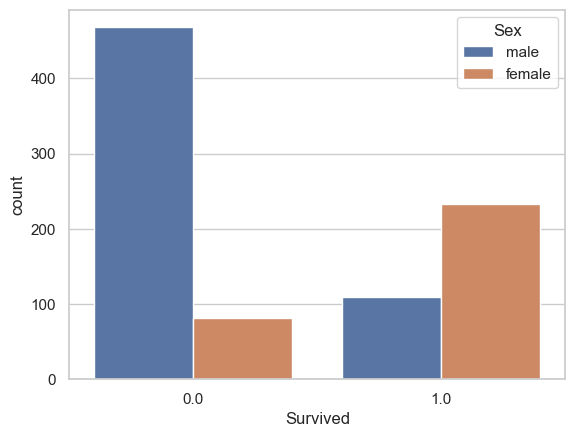

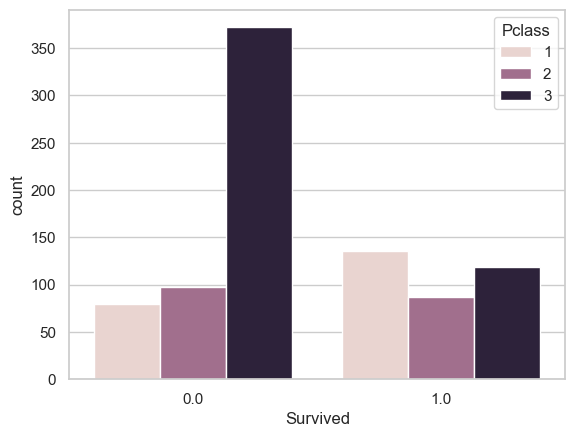

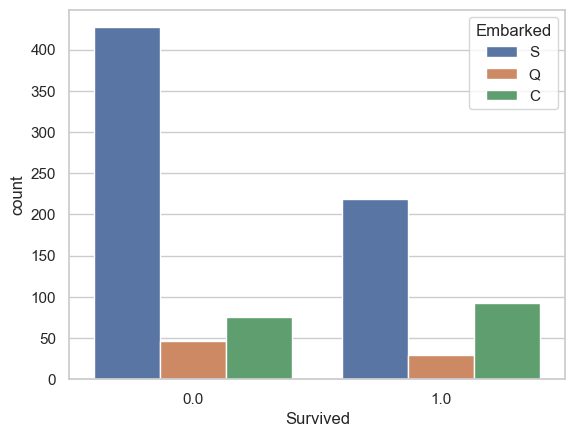

In [25]:
temp_columns = ["Sex", "Pclass", "Embarked"]
for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()


- 범주형 데이터 간 상관관계 분석


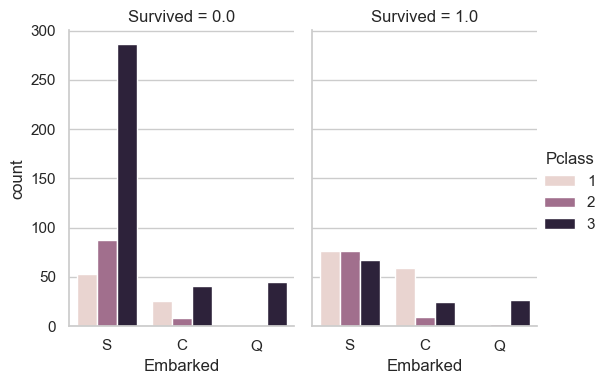

In [26]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(
    x="Embarked",
    hue="Pclass",
    col="Survived",
    data=temp_df,
    kind="count",
    height=4,
    aspect=0.7,
)

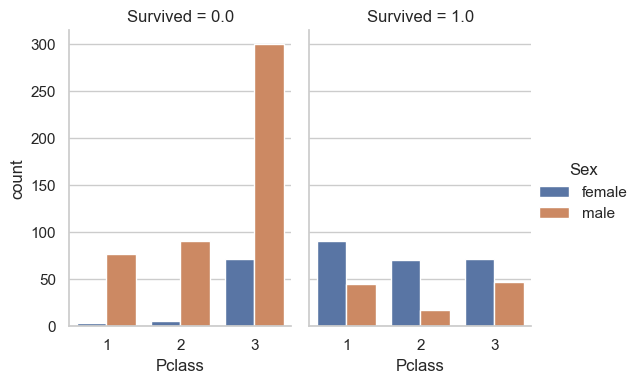

In [27]:
temp_df = pd.merge(one_hot_df[temp_columns], y_true, left_index=True, right_index=True)
g = sns.catplot(
    x="Pclass",
    hue="Sex",
    col="Survived",
    data=temp_df,
    kind="count",
    height=4,
    aspect=0.7,
)

# Heatmap 함수

- Heapmap 함수
  - 상관계수(correlation) 데이터로 확인
  - corr 함수로 상관계수 계산


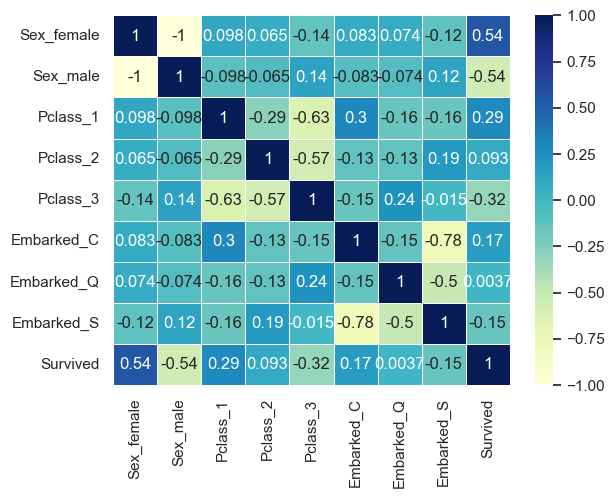

In [28]:
crosscheck_columns = [
    col_name
    for col_name in one_hot_df.columns.tolist()
    if col_name.split("_")[0] in temp_columns and "_" in col_name
]

# temp 열
temp_df = pd.merge(
    one_hot_df[crosscheck_columns], y_true, left_index=True, right_index=True
)

corr = temp_df.corr()
sns.set_theme()
ax = sns.heatmap(corr, annot=True, linewidths=0.5, cmap="YlGnBu")